### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [854]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [622]:
data = pd.read_csv('data/coupons.csv')

In [623]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [624]:
#Missing Values 

print(data.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [628]:
#Missing Values Dropped 
data_1 = (data.dropna())
print(data_1)

data_1.describe()

          destination  passanger weather  temperature  time  \
1237  No Urgent Place      Alone   Sunny           55   2PM   
1238  No Urgent Place  Friend(s)   Sunny           80  10AM   
1239  No Urgent Place  Friend(s)   Sunny           80  10AM   
1240  No Urgent Place  Friend(s)   Sunny           80  10AM   
1241  No Urgent Place  Friend(s)   Sunny           80   2PM   
...               ...        ...     ...          ...   ...   
8293             Work      Alone   Rainy           55   7AM   
8294             Work      Alone   Rainy           55   7AM   
8295             Work      Alone   Snowy           30   7AM   
8296             Work      Alone   Snowy           30   7AM   
8297             Work      Alone   Sunny           80   7AM   

                     coupon expiration gender age maritalStatus  ...  \
1237        Restaurant(<20)         1d   Male  26        Single  ...   
1238           Coffee House         2h   Male  26        Single  ...   
1239                    Bar

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,108.000000,108.000000,108.0,108.000000,108.000000,108.000000,108.000000,108.000000
mean,62.870370,0.398148,1.0,0.611111,0.129630,0.129630,0.870370,0.574074
std,17.971989,0.491798,0.0,0.489771,0.337461,0.337461,0.337461,0.496788
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [837]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 1237 to 8297
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           108 non-null    object
 1   passanger             108 non-null    object
 2   weather               108 non-null    object
 3   temperature           108 non-null    int64 
 4   time                  108 non-null    object
 5   coupon                108 non-null    object
 6   expiration            108 non-null    object
 7   gender                108 non-null    object
 8   age                   108 non-null    object
 9   maritalStatus         108 non-null    object
 10  has_children          108 non-null    int64 
 11  education             108 non-null    object
 12  occupation            108 non-null    object
 13  income                108 non-null    object
 14  car                   108 non-null    object
 15  Bar                   108 non-null  

4. What proportion of the total observations chose to accept the coupon? 



In [626]:
a = (data_1['Y'] == 1).sum()

b = (data_1['Y'] == 0).sum()

ab = a + b

prop = a / ab * 100 
prop


#The proportion of total observations is 0.574. The acceptance rate for coupons is 57.41% 


57.407407407407405

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Count of Coupon Usage by Destination of Drivers')

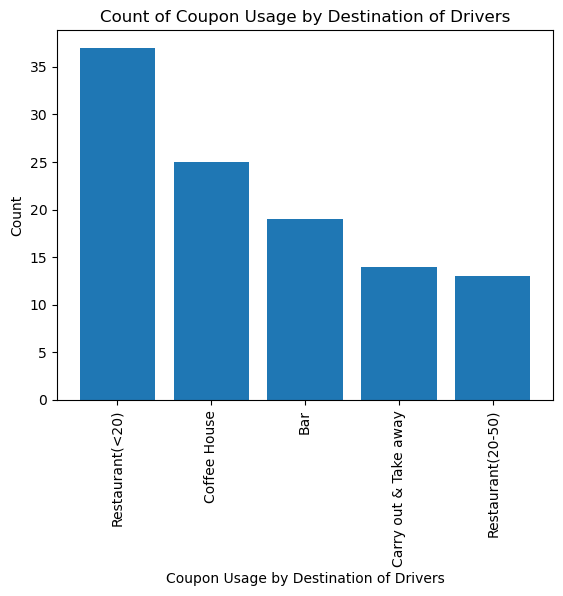

In [627]:
plt.bar(data_1['coupon'].unique(),data_1['coupon'].value_counts())
plt.xticks(rotation=90)
plt.xlabel("Coupon Usage by Destination of Drivers")
plt.ylabel("Count")
plt.title("Count of Coupon Usage by Destination of Drivers")

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Distribution of Temperatures')

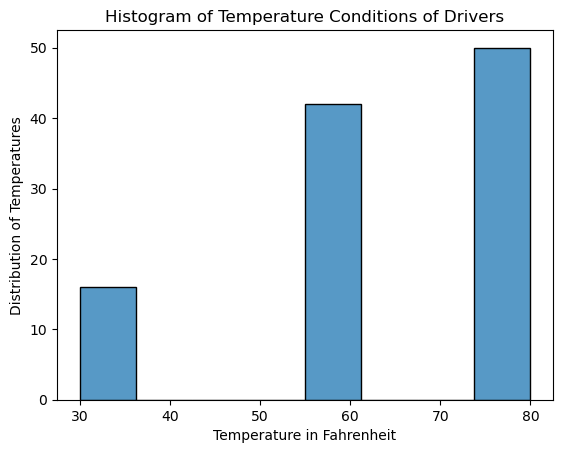

In [632]:
sns.histplot(data_1['temperature'])
plt.title("Histogram of Temperature Conditions of Drivers")
plt.xlabel("Temperature in Fahrenheit")
plt.ylabel("Distribution of Temperatures")


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [839]:
bar_c = data_1[data_1["coupon"] == "Bar"]
bar_c.head(10)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1239,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1250,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,1,0,0
1254,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,1,1,0,1,0
2613,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,41,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,0
2617,Home,Alone,Sunny,55,6PM,Bar,1d,Female,41,Married partner,...,1~3,1~3,1~3,less1,1,0,0,1,0,0
2621,Work,Alone,Sunny,55,7AM,Bar,1d,Female,41,Married partner,...,1~3,1~3,1~3,less1,1,1,1,0,1,0
3101,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,26,Married partner,...,less1,1~3,1~3,less1,1,1,0,0,1,0
3105,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Married partner,...,less1,1~3,1~3,less1,1,0,0,1,0,0
3109,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Married partner,...,less1,1~3,1~3,less1,1,1,1,0,1,0
7313,No Urgent Place,Friend(s),Rainy,55,10PM,Bar,2h,Female,26,Single,...,less1,1~3,1~3,1~3,1,1,0,0,1,1


In [836]:
bar_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 1239 to 8292
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           13 non-null     object
 1   passanger             13 non-null     object
 2   weather               13 non-null     object
 3   temperature           13 non-null     int64 
 4   time                  13 non-null     object
 5   coupon                13 non-null     object
 6   expiration            13 non-null     object
 7   gender                13 non-null     object
 8   age                   13 non-null     object
 9   maritalStatus         13 non-null     object
 10  has_children          13 non-null     int64 
 11  education             13 non-null     object
 12  occupation            13 non-null     object
 13  income                13 non-null     object
 14  car                   13 non-null     object
 15  Bar                   13 non-null    

2. What proportion of bar coupons were accepted?


In [636]:
c = (bar_c['Y'] == 0).sum()
d =  (bar_c['Y'] == 1).sum()
cd = c + d

cd_prop = d / cd 
cd_prop * 100


#The proportion 0.23. The acceptance rate is 23.07% for bar coupoons.  

23.076923076923077

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


/var/folders/y2/rr8mb9x148s5hzs6yqz_r9vc0000gn/T/ipykernel_1660/1340609242.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 0, 'Users who went to bar > 3 and bar < 3')

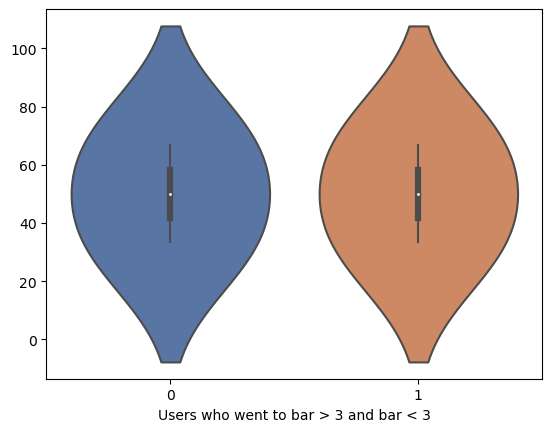

In [849]:

bar_c['Bar'] = bar_c['Bar'].str.replace('never', "0").str.replace('less1',"1").str.replace('4~8', "4").str.replace('1~3', "3").str.replace('gt8',"8")

#Data was cleaned in the Bar column to remove unncessary symbols and create purely numerical values for easier data manipulation. 


total_accepted_bar_c = bar_c.query('Y == 1')['Bar'].count()
total_accepted_bar_c


# went to a bar 3 or fewer times a month

ans1 = bar_c.groupby(bar_c['Bar'] < '3')[['Y']].sum()
ans1
ar = ans1 / total_accepted_bar_c
ar_1 = ar * 100
ar_1 

#The acceptance rate of those who went to the bar less than 3 times is  33.3%. 



# went to a bar more than 3 times 

ans2 = bar_c.groupby(bar_c['Bar'] > '3')[['Y']].sum()
ans2
second_ar = ans2 / total_accepted_bar_c
ar_2 = second_ar * 100
ar_2


# The acceptance rate of those who went to the bar more than 3 times is 66.6%.


sns.violinplot(data = [ar_1,ar_2])
plt.xlabel("Users who went to bar > 3 and bar < 3")

#There appears to be an equal distribution of users who went to the bar less than 3 times a month and those who went to the bar more than 3 times a month. 



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Text(0.5, 0, 'Users who went to the bar > 1 and age > 25 and All Others')

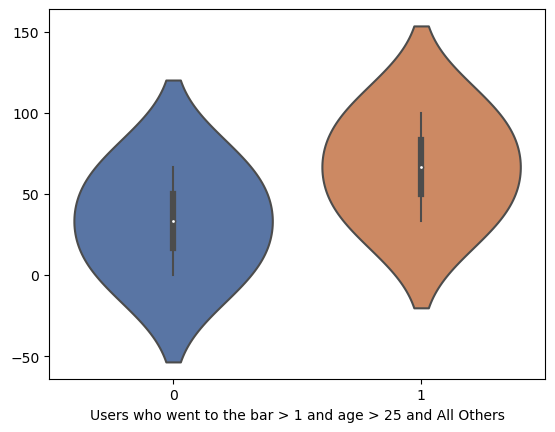

In [825]:
#bar more than once and over the age of 25 
ans3= bar_c.groupby([bar_c['Bar'] > '1',bar_c['age'] > '25'])[['Y']].sum()
third_ar = ans3 / total_accepted_bar_c
ar_3 = third_ar * 100 
ar_3

#The acceptance rate for drivers who went to the bar more than once a month and are over the age of 25 is is 66.66%  

#all others who accepted a bar coupon 

all_others = total_accepted_bar_c - ans3
all_others_r = all_others/total_accepted_bar_c * 100
all_others_r

#The acceptance rate of all others who accpted a bar coupon is 33.3%. 
#[ar_3, all_others_r]

sns.violinplot(data = [ar_3, all_others_r])
plt.xlabel("Users who went to the bar > 1 and age > 25 and All Others")

#There is a higher distribution of those who went to the bar more than once a month and are over the age of 25 than all others who accepted a bar coupon. 


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [850]:
#Drivers who go to bar more than once a month, friends as passengers, and in the legal profession
ans5 = bar_c.query("Bar > '1'")
ans6= ans5.groupby([bar_c['passanger'] == 'Friend(s)',bar_c['occupation'] == 'Legal'])[['Y']].sum()
ans7 = ans6/total_accepted_bar_c * 100
ans7

#The acceptance rate of drivers who go to bar more than once a month, have friends as passengers, and are in the legal profession is 33.3%.



,,Y
passanger,occupation,
False,False,33.333333
True,False,33.333333


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Text(0.5, 0, 'Target Audiences')

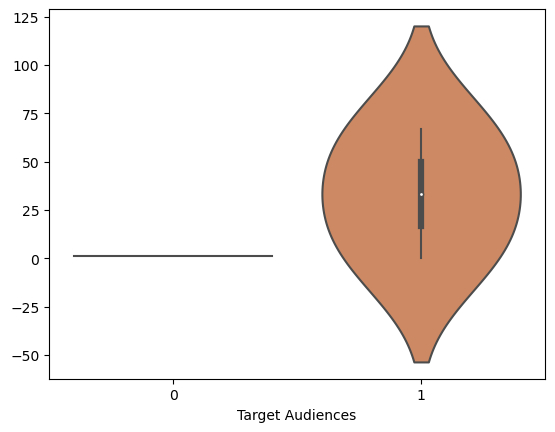

In [853]:
# Drivers who go to bars more than once a month, had friends as passengers, and had a married partner
ans7 = bar_c.query("Bar > '1'")
ans8= ans5.groupby([bar_c['passanger'] == 'Friend(s)',bar_c['maritalStatus'] == 'Married Partner'])[['Y']].sum()
ans9 = ans8/total_accepted_bar_c * 100
ans9

#The acceptance rate of drivers who go to bars more than once a month, had friends as passengers, and had a married partner is 33.3%. 

#Drivers who go to bars more than once a month and are under the age of 30

ans10 = bar_c.groupby([bar_c['Bar'] > '1',bar_c['age'] < '30'])[['Y']].sum()
ans11 = ans10/total_accepted_bar_c * 100
ans11

#The acceptance rate of drivers who go to bars more than once a month and are under the age of 30 is 66.6%. 


sns.violinplot(data = [ans8, ans11])
plt.xlabel("Target Audiences")

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# I hypothesize that drivers who go to the bar more than once a month are more likely to use a bar coupon and that age is signficant factor in accepting a bar coupon. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [479]:
data_1.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1237,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1238,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,0
1239,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1240,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Single,...,4~8,4~8,1~3,never,1,1,0,0,1,0
1241,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1


In [771]:
#Coffee House coupons will be investigated for this part of the data exploration.

coffee_c = data_1[data_1["coupon"] == "Coffee House"]
coffee_c

e = (coffee_c['Y'] == 0).sum()
f =  (coffee_c['Y'] == 1).sum()
ef = e + f

coffee_coupon = f/ef * 100
coffee_coupon

#The acceptance rate of coffee house coupons is 51.35% 


51.35135135135135

In [778]:
coffee_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 1238 to 8290
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           37 non-null     object
 1   passanger             37 non-null     object
 2   weather               37 non-null     object
 3   temperature           37 non-null     int64 
 4   time                  37 non-null     object
 5   coupon                37 non-null     object
 6   expiration            37 non-null     object
 7   gender                37 non-null     object
 8   age                   37 non-null     object
 9   maritalStatus         37 non-null     object
 10  has_children          37 non-null     int64 
 11  education             37 non-null     object
 12  occupation            37 non-null     object
 13  income                37 non-null     object
 14  car                   37 non-null     object
 15  Bar                   37 non-null    

In [772]:
coffee_c["CoffeeHouse"] = coffee_c["CoffeeHouse"].str.replace('never', "0").str.replace('less1',"1").str.replace('4~8', "4").str.replace('1~3', "3").str.replace('gt8',"8")

#Data was cleaned in the CoffeeHouse column to remove unncessary symbols and create purely numerical values for easier data manipulation. 

/var/folders/y2/rr8mb9x148s5hzs6yqz_r9vc0000gn/T/ipykernel_1660/517242623.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Violin Plot of Coffee Coupon Acceptance and Coffee Coupon Rejection')

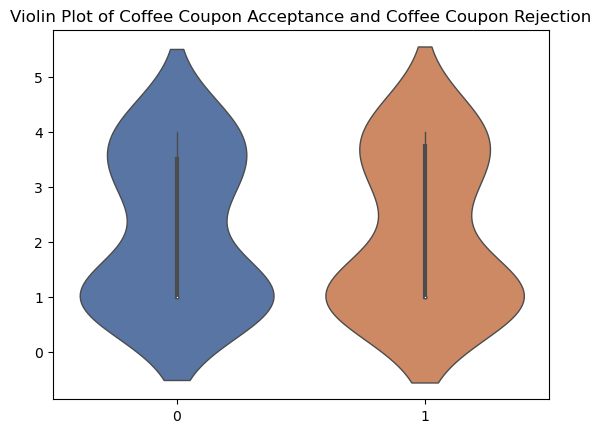

In [776]:
coffee_accepted_coupons = coffee_c.query('Y == 1 & coupon == "Coffee House"')['CoffeeHouse']
coffee_accepted_coupons
coffee_rejected_coupons = coffee_c.query('Y == 0 & coupon == "Coffee House"')['CoffeeHouse']
coffee_rejected_coupons

sns.violinplot(data=[coffee_accepted_coupons, coffee_rejected_coupons], linewidth = 1)
plt.title("Violin Plot of Coffee Coupon Acceptance and Coffee Coupon Rejection")

#Findings
#The violin plot demonstrates the Kernel Density estimate of the acceptance and rejection of coffee house coupons.
#Overall, there appears to be a slightly higher distribution for accepted coffee house coupons than reject coffee house coupons.

Text(0, 0.5, 'Count of Accepted Coffee House Coupons')

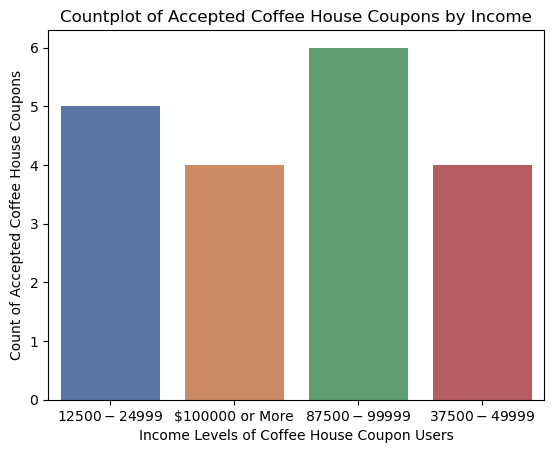

In [779]:
sns.countplot(data = coffee_c.query('Y == 1'), x = 'income')
plt.title("Countplot of Accepted Coffee House Coupons by Income")
plt.xlabel("Income Levels of Coffee House Coupon Users")
plt.ylabel("Count of Accepted Coffee House Coupons")

#Findings
#The countplot of accepted coffee house coupons demonstrates that users within the income level of $87,500-99,000 accepted the coffee house coupons the most.
#Users who were in the $12,500-24,999 income range were the second highest. While those within $37,500-49,999 and $100,000 or More, were both the lowest levels of accepted coffee coupons.
#Those in the highest income level were less likely to accept the coupon, while those in the lowest and second higest level were more likely to accept the coupon.

In [780]:
fig = px.histogram(coffee_c.query('Y == 1'), x = 'occupation', title=" Histogram of Occupation of Coffee House Coupon Users", labels={"occupation": "Occupation of Coffee House Coupon Users"})
fig.show()

#Findings
#The histogram demonstrated a greater distribution of accepting coffee house coupons from users in the Computer & Mathematical career fields.

In [781]:

fig_2 = px.pie(coffee_c.query('Y == 1'), values='CoffeeHouse', names='gender', title = 'Acceptance of Coffee House Coupons by Gender', color_discrete_sequence=px.colors.sequential.RdBu)
fig_2.show()

#The pie chart demonstrates a greater percentage of men who accepted the coffee house coupons, compared to women users. 


In [ ]:
#Next Steps and Recommendations 
#Some next steps for understanding the usage of coupons for drivers is to perform more modeling.
#It is clear that multiple factors persuade a driver to use these kinds of coupons and more modeling would
#allow for a more detailed understanding of what motivates certain drivers to use specific coupons for different purposes. 